## Seattle Fremont Bridge Hourly Bike Counter using Jupyter Notebook
Follwoing Jake Vanderplas

By Takaoki Koyanagi

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'


In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, "Fremont.csv")


('Fremont.csv', <http.client.HTTPMessage at 0x207263b2b70>)

In [3]:
import pandas as pd
data = pd.read_csv("Fremont.csv", index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-31 23:00:00,7.0,6.0
2019-01-31 22:00:00,13.0,16.0
2019-01-31 21:00:00,18.0,27.0
2019-01-31 20:00:00,32.0,33.0
2019-01-31 19:00:00,40.0,94.0


In [4]:
%matplotlib inline

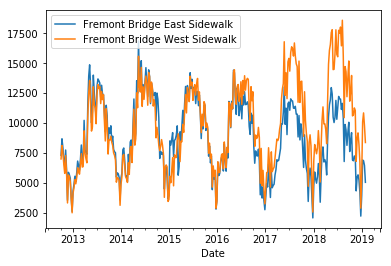

In [5]:
data.resample('W').sum().plot()

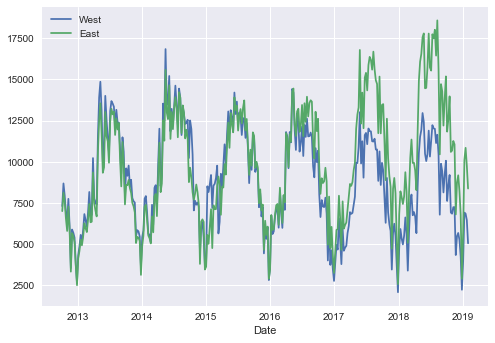

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['West', 'East']
data.resample('W').sum().plot()

(0, 1098983.95)

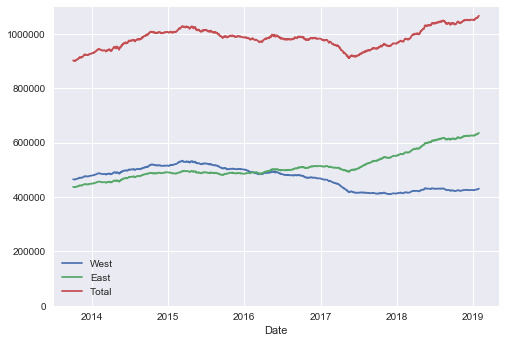

In [7]:
data['Total'] = data["West"] + data["East"]

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

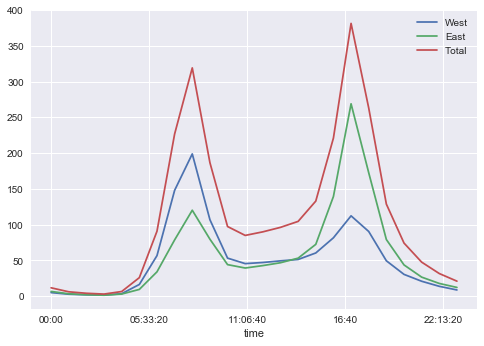

In [8]:
data.groupby(data.index.time).mean().plot()

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


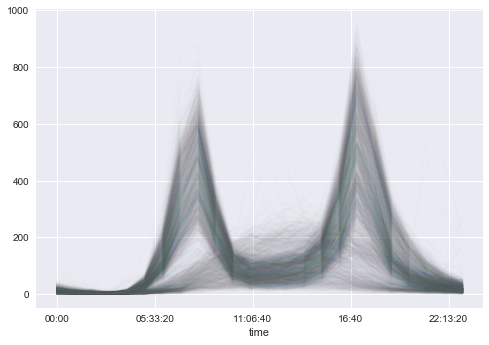

In [10]:
pivoted.plot(legend=False, alpha=0.01)